# Ningguang Lv. 90 + Lost Prayer to the Sacred Winds R1 Lv. 90 (with 4 stacks) + 2-Piece Archaic Petra + Geo DMG Bonus Goblet + Strategic Reserve Buff

[p0]
atk_bonus = 1.995731707317073
dmg_bonus = 1.296
dmg_crit = 0.5
rate_crit = 0.25
dmg_out = 7148.4525
score = 86.71518988832989

[p1]
atk_bonus = 1.0682443974858216
dmg_bonus = 1.296
dmg_crit = 0.8178178178178178
rate_crit = 0.4089089089089089
dmg_out = 6148.949834120445
score = 77.03125117102478

[p2]
atk_bonus = 0.7420520508767156
dmg_bonus = 1.296
dmg_crit = 1.4142135623730951
rate_crit = 0.7071067811865476
dmg_out = 7987.70447445322
score = 89.20812745045892

[p3]
atk_bonus = 0.8707317073170732
dmg_bonus = 1.296
dmg_crit = 2.0
rate_crit = 1.0
dmg_out = 12708.360000000002
score = 110.80507024106163



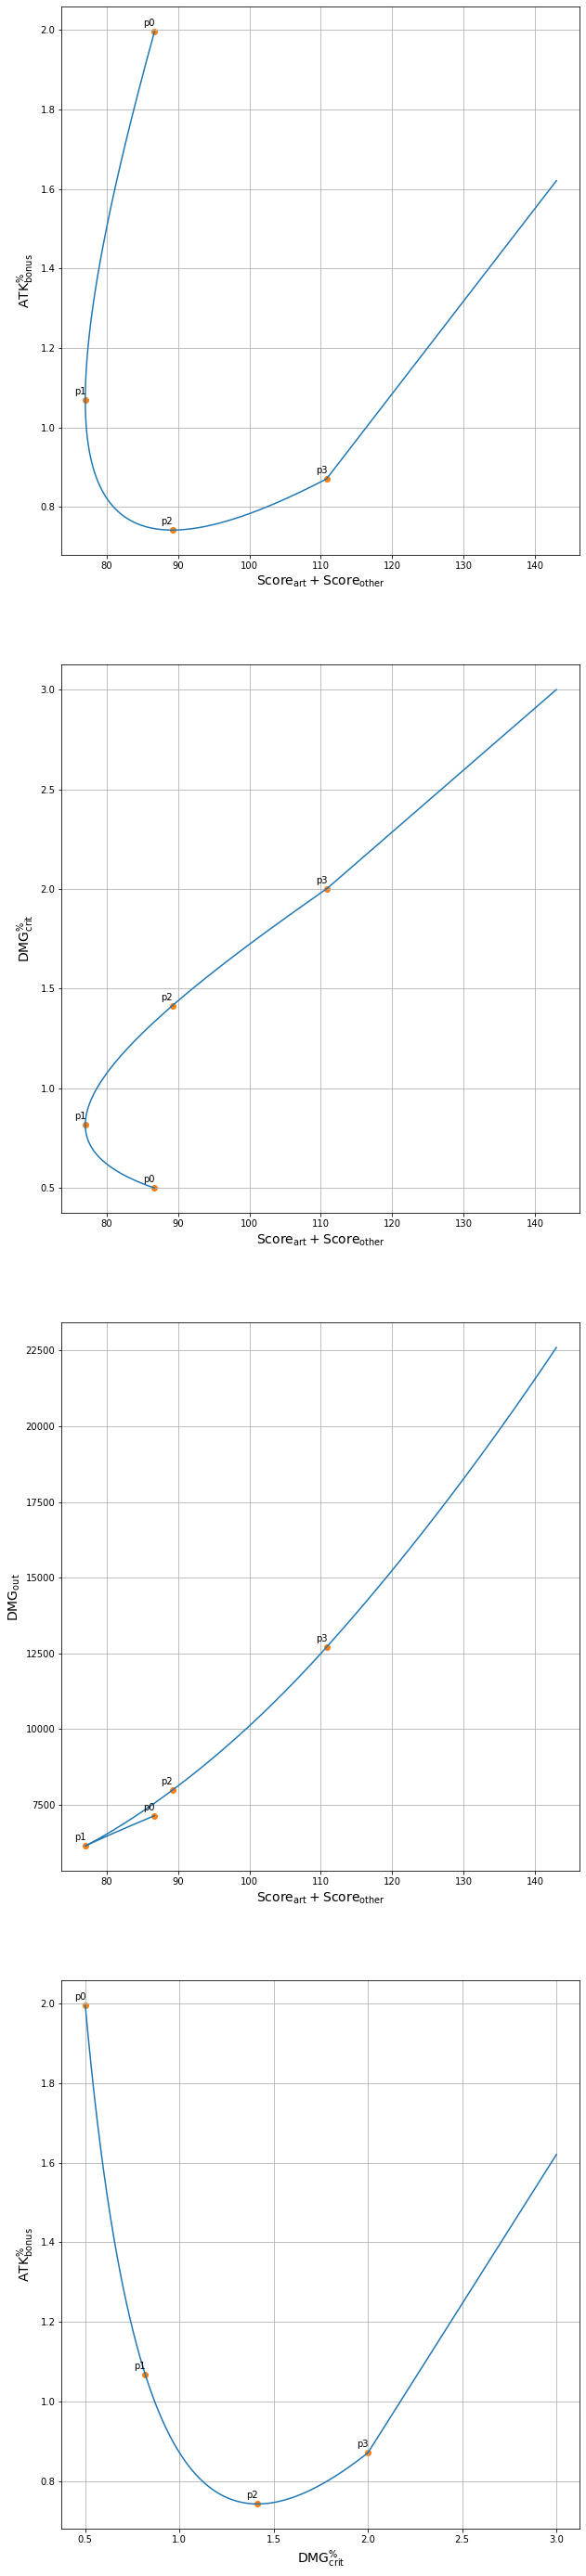

In [1]:
import numpy as np
from matplotlib import pyplot

def plot(ax, x, y):
    ax.set_xlabel(x['label'], fontsize=14)
    ax.set_ylabel(y['label'], fontsize=14)
    ax.plot(x['line_values'], y['line_values'], color='C0')
    ax.scatter(x['point_values'], y['point_values'], color='C1')
    for i in range(4):
        ax.annotate('p{}'.format(i), (x['point_values'][i], y['point_values'][i]), xytext=(-12.0, 6.0), textcoords='offset pixels')
    ax.grid()

def compute_stats(atk_base, atk_flat, dmg_bonus, dmg_crit):
    rate_crit = np.minimum(dmg_crit/2, 1.0)
    atk_bonus = (3/4) * (dmg_crit + 1/rate_crit) - 1 - atk_flat / atk_base
    dmg_out = (atk_base * (1 + atk_bonus) + atk_flat) * (1 + dmg_bonus) * (1 + rate_crit * dmg_crit)
    score = atk_bonus/0.0466 + dmg_bonus/0.0466 + rate_crit/0.0311 + dmg_crit/0.0622
    return (atk_bonus, rate_crit, dmg_out, score)

atk_base = 212 + 608
atk_flat = 311
dmg_bonus = (24.0 + 4 * 8.0 + 15.0 + 46.6 + 12.0) / 100

l_dmg_crit = np.linspace(0.5, 3.0, 1000)
l_atk_bonus, l_rate_crit, l_dmg_out, l_score = compute_stats(atk_base, atk_flat, dmg_bonus, l_dmg_crit)

p_dmg_crit = np.array([0.5, l_dmg_crit[np.argmin(l_score)], np.sqrt(2), 2.0])
p_atk_bonus, p_rate_crit, p_dmg_out, p_score = compute_stats(atk_base, atk_flat, dmg_bonus, p_dmg_crit)

dmg_crit = {'label': r'$\mathrm{DMG_{crit}^{\%}}$', 'line_values': l_dmg_crit, 'point_values': p_dmg_crit}
rate_crit = {'label': r'$\mathrm{Rate_{crit}^{\%}}$', 'line_values': l_rate_crit, 'point_values': p_rate_crit}
atk_bonus = {'label': r'$\mathrm{ATK_{bonus}^{\%}}$', 'line_values': l_atk_bonus, 'point_values': p_atk_bonus}
dmg_out = {'label': r'$\mathrm{DMG_{out}}$', 'line_values': l_dmg_out, 'point_values': p_dmg_out}
score = {'label': r'$\mathrm{Score_{art}} + \mathrm{Score_{other}}$', 'line_values': l_score, 'point_values': p_score}

for i in range(4):
    print('[p{}]'.format(i))
    print('atk_bonus =', atk_bonus['point_values'][i])
    print('dmg_bonus =', dmg_bonus)
    print('dmg_crit =', dmg_crit['point_values'][i])
    print('rate_crit =', rate_crit['point_values'][i])
    print('dmg_out =', dmg_out['point_values'][i])
    print('score =', score['point_values'][i])
    print()

fig, axs = pyplot.subplots(4, figsize=(10, 50))

plot(axs[0], score, atk_bonus)
plot(axs[1], score, dmg_crit)
plot(axs[2], score, dmg_out)
plot(axs[3], dmg_crit, atk_bonus)